In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [2]:
N = 1000
D = 2

<IPython.core.display.Javascript object>


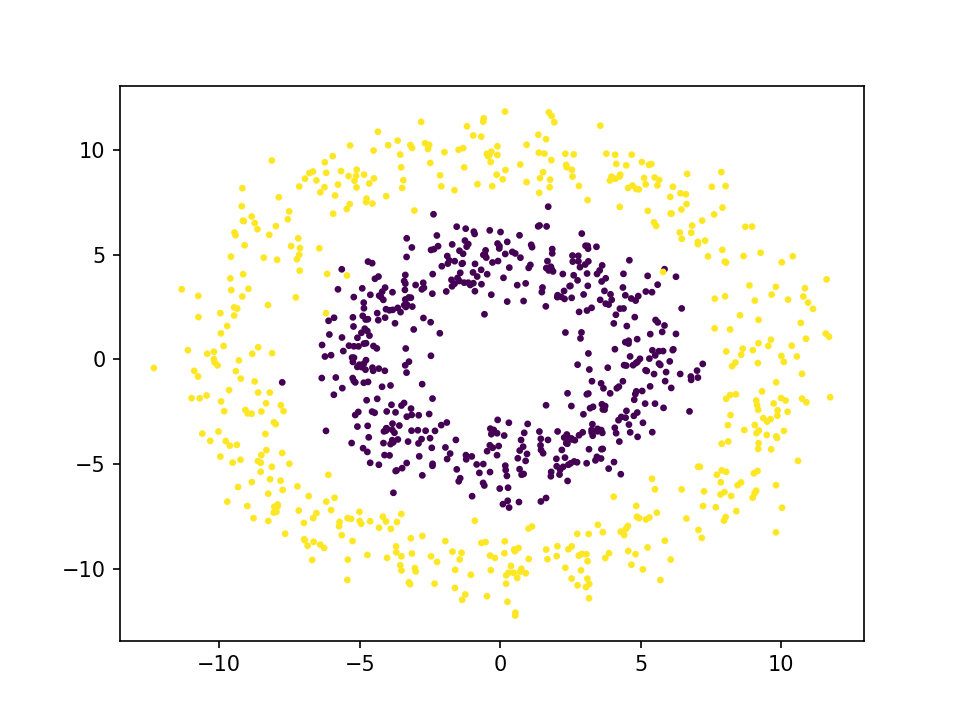

array([[ 0.24894426,  5.60726556],
       [ 4.30630631, -2.75921874],
       [ 1.45134251, -4.3381106 ],
       ...,
       [-9.14858483,  4.06159336],
       [ 5.29101635,  9.28684584],
       [ 8.57364327,  0.2117879 ]])

In [3]:
R_inner = 5
R_outer = 10

R1 = np.random.randn(N // 2) + R_inner
theta = 2 * np.pi * np.random.random(N//2)  #polar coordinates 
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T #x-y coordinates

R2 = np.random.randn(N // 2) + R_outer
theta = 2 * np.pi * np.random.random(N//2)  #polar coordinates 
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T #x-y coordinates

X = np.concatenate([X_inner, X_outer])
T = np.array([0] * (N // 2) + [1] * (N // 2))

plt.scatter(X[:, 0], X[:, 1], c = T, s= 5)
plt.show()
X

In [4]:
def sigmoid(a) :
    return 1 / (1 + np.exp(-a))

def classification_rate(X, Y) :
    return np.mean(X == Y)

def cross_entropy(T, pY) :
    return -np.mean(T * np.log(pY) + (1 - T) * np.log(1 - pY))

def cross_entropy_2(T, Y) :
    E = 0
    for i in range(len(T)) :
        if T[i] == 1 :
            E -= np.log(Y[i])
        else :
            E -= np.log(1 - Y[i])
    return E

def forward(X, W, b) : 
    return sigmoid(X.dot(W) + b)

In [9]:
X[0, :].shape

(2,)

1.121342632919968
0.5696567214166136
0.4326092079620288
0.3471530387547015
0.2905170804510298
0.2507494494000184
0.2214569383904094
0.19903457871681088
0.1813326592701333
0.16700262508707084
0.1551605617771167
0.14520495369588537
0.1367131114888213
0.12937970155102266
0.12297883675178498
0.11733989384525867
0.11233162023990595
0.10785140919989927
0.10381789077325693
0.10016570482711043
0.09684174341773774
0.09380240318929225
0.09101154517192508
0.0884389585128373
0.0860591888014809
0.08385063394547135
0.08179483895789817
0.079875940411405
0.07808022476180305
0.07639577420085944
0.07481218043643786
0.0733203116587815
0.07191212149790846
0.07058049139197213
0.06931909973388765
0.06812231262750205
0.06698509219482023
0.06590291922474571
0.06487172760802087
0.06388784851094091
0.06294796263745557
0.062049059241704216
0.0611884008004273
0.06036349245176424
0.059572055464810314
0.058812004131443996
0.05808142557486158
0.05737856205297945
0.056701795403295216
0.056049633331975275


<IPython.core.display.Javascript object>


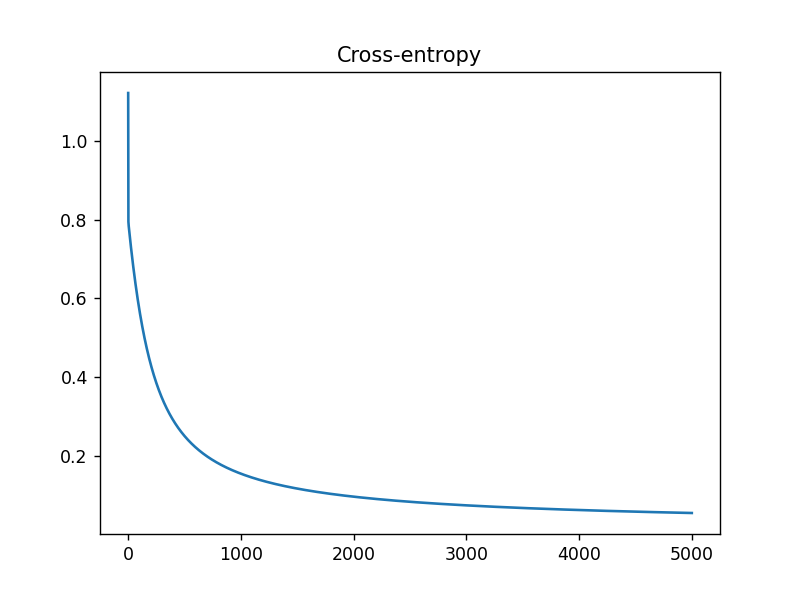

Final weight : [ 1.60093568 -0.01417648  0.01479451]
Classification rate 0.994
Final bias : -11.869052944460076


In [86]:
b = 1
ones = np.ones((N, 1))

r = np.zeros((N, 1)) #column of radius, it makes our points lin separable
for i in range(N) :
    r[i] = np.sqrt(X[i, :].dot(X[i, :]))
    
Xb = np.concatenate((ones, r, X), axis = 1) #Xb = X with bias term
Xr = np.concatenate((r, X), axis = 1)

w = np.random.randn(D + 1) / np.sqrt(D + 1)
# z = Xb.dot(w)
Y = forward(Xr, w, b)

learning_rate = 0.0001
l1 = 0.01

error = []
for i in range(5000) :
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 100 == 0 :
        print(e)
        
    #gradient-descent
    w -= learning_rate * (Xr.T.dot(Y - T) + l1 * np.sign(w))
    b -= learning_rate * (Y - T).sum()
    Y = forward(Xr, w, b)
    
plt.plot(error)
plt.title('Cross-entropy')
plt.show()

print('Final weight :', w)
print('Classification rate', classification_rate(T, np.round(Y)))
print('Final bias :', b)


In [100]:
np.matrix(X[:, 0] * X[:, 1]).shape

(1, 1000)

In [ ]:
np.matrix(X[:, 0] * X[:, 1]).T.shape

(1000, 2)